In [1]:
from src.api.flipside_crypto import FlipsideCrypto
from src.misc.data import format_dtypes

import pandas as pd
from matplotlib import pyplot as plt

In [2]:
ts = 1672834013
pair = "WBTC-ETH"

In [4]:
flipside = FlipsideCrypto("249f0e62-a575-4ddb-8ccd-b7618eb9d766")
syncs_and_swaps = flipside.get_syncs_and_swaps("uniswap-v2", pair, ts, amount=2000)

In [5]:
df = pd.DataFrame(syncs_and_swaps)
df.head()

,_log_id,block_number,block_timestamp,tx_hash,event_index,event_name,event_inputs
0,0x0c9a6a6610aa20a0d1a8dae3a1e15e6db698acd8444b...,16333918,2023-01-04 14:07:23.000,0x0c9a6a6610aa20a0d1a8dae3a1e15e6db698acd8444b...,194,Sync,"{'reserve0': '42434741500318', 'reserve1': '33..."
1,0x0c9a6a6610aa20a0d1a8dae3a1e15e6db698acd8444b...,16333918,2023-01-04 14:07:23.000,0x0c9a6a6610aa20a0d1a8dae3a1e15e6db698acd8444b...,195,Swap,"{'amount0In': '0', 'amount0Out': '306550903', ..."
2,0xcb934997b3ed72e57a11a2021cd99a0e2a7107fbf590...,16333921,2023-01-04 14:07:59.000,0xcb934997b3ed72e57a11a2021cd99a0e2a7107fbf590...,2,Sync,"{'reserve0': '42435324855117', 'reserve1': '33..."
3,0xcb934997b3ed72e57a11a2021cd99a0e2a7107fbf590...,16333921,2023-01-04 14:07:59.000,0xcb934997b3ed72e57a11a2021cd99a0e2a7107fbf590...,3,Swap,"{'amount0In': '583354799', 'amount0Out': '0', ..."
4,0x938359af1763c6791a0ad94c0e8541bf9e9528b69bb0...,16333928,2023-01-04 14:09:23.000,0x938359af1763c6791a0ad94c0e8541bf9e9528b69bb0...,16,Sync,"{'reserve0': '42434935939516', 'reserve1': '33..."


In [12]:
syncs_df = df[df["event_name"] == "Sync"]
swaps_df = df[df["event_name"] == "Swap"]

# for each swaps wand to merge the previous sync (same tx_hash, event_index - 1)
swaps_df["sync_event_index"] = 0
swaps_df["sync_event_index"] = swaps_df["event_index"] - 1


/var/folders/xv/9qwc_ryj6l98nrg9pnn_zp7h0000gn/T/ipykernel_3230/87332568.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swaps_df["sync_event_index"] = 0
/var/folders/xv/9qwc_ryj6l98nrg9pnn_zp7h0000gn/T/ipykernel_3230/87332568.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swaps_df["sync_event_index"] = swaps_df["event_index"] - 1


In [105]:
df = pd.merge(swaps_df, syncs_df[["tx_hash", "event_index", "event_inputs"]], left_on=["tx_hash", "sync_event_index"], right_on=["tx_hash", "event_index"], how="left")
df = format_dtypes(df, {"event_inputs_x": dict, "event_inputs_y": dict})
dtypes =  {
    "amount0In": int, 
    "amount0Out": int, 
    "amount1In": int, 
    "amount1Out": int,
    "reserve0": int, 
    "reserve1": int}
df = format_dtypes(df, dtypes)
df.head()

,_log_id,block_number,block_timestamp,tx_hash,event_index_x,event_name,event_inputs_x,sync_event_index,event_index_y,event_inputs_y,amount0In,amount0Out,amount1In,amount1Out,sender,to,reserve0,reserve1
0,0x0c9a6a6610aa20a0d1a8dae3a1e15e6db698acd8444b...,16333918,2023-01-04 14:07:23.000,0x0c9a6a6610aa20a0d1a8dae3a1e15e6db698acd8444b...,195,Swap,"{'amount0In': '0', 'amount0Out': '306550903', ...",194,194,"{'reserve0': '42434741500318', 'reserve1': '33...",0,306550903,245109969116886778,0,0x1111111254eeb25477b68fb85ed929f73a960582,0x74de5d4fcbf63e00296fd95d33236b9794016631,42434741500318,33828149486051957946193
1,0xcb934997b3ed72e57a11a2021cd99a0e2a7107fbf590...,16333921,2023-01-04 14:07:59.000,0xcb934997b3ed72e57a11a2021cd99a0e2a7107fbf590...,3,Swap,"{'amount0In': '583354799', 'amount0Out': '0', ...",2,2,"{'reserve0': '42435324855117', 'reserve1': '33...",583354799,0,0,463637612549270337,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xf29450019834d7874b4e306275c4334326ac27f1,42435324855117,33827685848439408675856
2,0x938359af1763c6791a0ad94c0e8541bf9e9528b69bb0...,16333928,2023-01-04 14:09:23.000,0x938359af1763c6791a0ad94c0e8541bf9e9528b69bb0...,17,Swap,"{'amount0In': '0', 'amount0Out': '388915601', ...",16,16,"{'reserve0': '42434935939516', 'reserve1': '33...",0,388915601,310963163089744374,0,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,0xa72a482e7c667e7db32a2b7171e9e3e97f2c65c5,42434935939516,33827996811602498420230
3,0x783d49ea9d48039c6254497a1a889d1a3a565397db19...,16333936,2023-01-04 14:10:59.000,0x783d49ea9d48039c6254497a1a889d1a3a565397db19...,129,Swap,"{'amount0In': '1039282967', 'amount0Out': '0',...",128,128,"{'reserve0': '42435975222483', 'reserve1': '33...",1039282967,0,0,825982970246676825,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xbe1737dae50f225b9480d68ee8f889e81d364615,42435975222483,33827170828632251743405
4,0xd3fe02abaf9dd15a79291b2f13f4b202f17301b2108e...,16333936,2023-01-04 14:10:59.000,0xd3fe02abaf9dd15a79291b2f13f4b202f17301b2108e...,517,Swap,"{'amount0In': '0', 'amount0Out': '54484329', '...",516,516,"{'reserve0': '42435920738154', 'reserve1': '33...",0,54484329,43562069394324489,0,0x68b3465833fb72a70ecdf485e0e4c7bd8665fc45,0x9d6f8ec99dc5c38b4d9915419f92a4808c6d89d1,42435920738154,33827214390701646067894


In [119]:
tradesize_usdc = (df["amount1In"] + df["amount1Out"]) / 10**18
print(tradesize_usdc.min(), tradesize_usdc.max())

4.6866565079288e-05 283.14780518463897


In [120]:
tradesize_eth = (df["amount0In"] + df["amount0Out"]) / 10**6
print(tradesize_eth.min(), tradesize_eth.max())

0.058912 361500.0


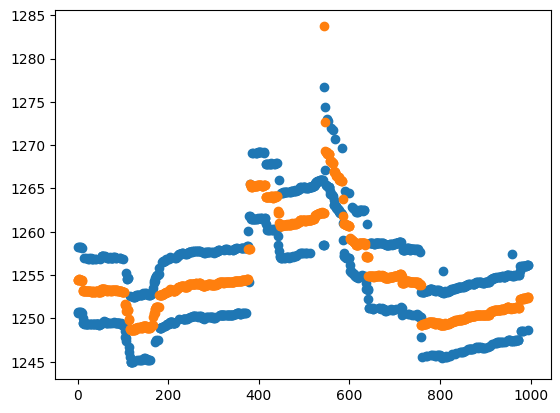

In [134]:
swap_prices = tradesize_eth / tradesize_usdc
reserve_prices = ((df["reserve0"] / 10**6) / (df["reserve1"]/ 10**18))
plt.scatter(swap_prices.index, swap_prices)
plt.scatter(reserve_prices.index, reserve_prices)

In [132]:
reserve_prices = ((df["reserve0"] / 10**6) / (df["reserve1"]/ 10**18))
reserve_prices

0      1254.421012
1      1254.455449
2      1254.432421
3      1254.493775
4      1254.490549
          ...     
991    1252.359304
992    1252.418287
993    1252.424185
994    1252.391669
995    1252.450652
Length: 996, dtype: object

In [59]:
int("19225959333123089834")

19225959333123089834